In [1]:
%matplotlib inline
import warnings 
warnings.simplefilter(action='ignore')
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('df_responselogistic_moral.csv', index_col=None, low_memory=False, header = 0)
df = df.drop("Unnamed: 0", axis = 1)
df = df.set_index('ResponseID')

df.head(20)

,UserID,AttributeLevel,ScenarioType,Saved,UserCountry3,Review_age,Review_education,Review_gender,Review_income,Review_political,Review_religious
ResponseID,,,,,,,,,,,
J6WRHLj8exr4bNwTm,6968366610050750.00,Young,Age,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61
ZQsAWst58jK9HcKvx,6968366610050750.00,Fit,Fitness,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61
nej5j6wM9YmiGHgA7,6968366610050750.00,More,Utilitarian,1,RUS,32.00,bachelor,male,35000.00,0.50,0.61
sibXCK6jno3M94BnR,6968366610050750.00,Hoomans,Species,1,RUS,32.00,bachelor,male,35000.00,0.50,0.61
zX9S9puJMRXnd54jY,6968366610050750.00,More,Utilitarian,0,RUS,32.00,bachelor,male,35000.00,0.50,0.61
QMcdnKDXB8aCjcyY7,5603843098383970.00,Hoomans,Species,1,BEL,23.00,graduate,male,35000.00,0.65,0.00
ex8Yry3j5xs2gQB9t,5603843098383970.00,Fit,Fitness,0,BEL,23.00,graduate,male,35000.00,0.65,0.00
gTsX5fFbjHHpeQWvf,5603843098383970.00,Young,Age,0,BEL,23.00,graduate,male,35000.00,0.65,0.00
i7ztRb5RdTu27QT4y,5603843098383970.00,Male,Gender,1,BEL,23.00,graduate,male,35000.00,0.65,0.00


In [3]:
df = df.rename(columns={'UserCountry3': 'Country', 'Review_age': 'Age', 'Review_education': 'Education', 'Review_gender': 'Gender', 
                        'Review_income': 'Income', 'Review_political': 'Political_level', 'Review_religious': 'Religious_level'})
df = df.drop("AttributeLevel", axis = 1)

In [4]:
df.isnull().sum()

UserID             0
ScenarioType       0
Saved              0
Country            0
Age                0
Education          0
Gender             0
Income             0
Political_level    0
Religious_level    0
dtype: int64

**Make Geographic Regions**

In [5]:
df.Country.unique()

array(['RUS', 'BEL', 'USA', 'FRA', 'ESP', 'CZE', 'JPN', 'CHE', 'DEU',
       'GRC', 'HUN', 'POL', 'PHL', 'AUS', 'CHL', 'BRA', 'CAN', 'IRL',
       'ITA', 'ISR', 'ROU', 'NLD', 'SGP', 'PER', 'LUX', 'BLR', 'PRT',
       'SVK', 'IDN', 'PAK', 'GBR', 'NZL', 'IND', 'FIN', 'MEX', 'CHN',
       'ISL', 'LVA', 'HRV', 'UKR', 'TUR', 'ZAF', 'AUT', 'TWN', 'CYP',
       'NOR', 'DNK', 'SWE', 'LTU', 'ARG', 'SAU', 'DOM', 'VNM', 'SRB',
       'ECU', 'KOR', 'EST', 'HKG', 'JOR', 'BGR', 'CRI', 'ARE', 'DZA',
       'COL', 'EGY', 'IRN', 'MAR', 'MYS', 'SVN', 'THA', 'TUN', 'VEN',
       'KAZ', 'BIH', 'URY', 'GTM'], dtype=object)

In [6]:
Geography = {"JPN": "East", "IDN": "East", "PAK": "East", "IND": "East", "CHN": "East", "TWN": "East", "SAU": "East", 
             "KOR": "East", "HKG": "East", "JOR": "East", "ARE": "East", "EGY": "East", "IRN": "East", "MYS": "East", 
             "THA": "East", "RUS": "West", "BEL": "West", "USA": "West", "ESP": "West", "CHE": "West", "DEU": "West", 
             "GRC": "West", "POL": "West", "AUS": "West", "BRA": "West", "CAN": "West", "IRL": "West", "ITA": "West", 
             "ISR": "West", "ROU": "West", "NLD": "West", "SGP": "West", "LUX": "West", "BLR": "West", "PRT": "West", 
             "GBR": "West", "NZL": "West", "FIN": "West", "ISL": "West", "LVA": "West", "HRV": "West", "UKR": "West", 
             "ZAF": "West", "AUT": "West", "CYP": "West", "NOR": "West", "DNK": "West", "SWE": "West", "LTU": "West", 
             "VNM": "West", "SRB": "West", "EST": "West", "BGR": "West", "SVN": "West", "TUN": "West", "KAZ": "West", 
             "BIH": "West", "FRA": "South", "CZE": "South", "HUN": "South", "PHL": "South", "CHL": "South", 
             "PER": "South", "SVK": "South", "MEX": "South", "TUR": "South", "ARG": "South", "DOM": "South", 
             "ECU": "South", "CRI": "South", "DZA": "South", "COL": "South", "MAR": "South", "VEN": "South", 
             "URY": "South", "GTM": "South"}

In [7]:
df['Geo'] = df['Country'].map(Geography)

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy import exp
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data = 5 * randn(100) + 50
# transform to be exponential
data = exp(data)
# histogram
pyplot.hist(data)
pyplot.show()

**Highly skewed so replace with the log**

In [57]:
age = df.Age
log_age = pd.DataFrame(np.log(age+1))
#df_log = df.assign(Age=log_age['Age'])

income = df.Income
log_income = pd.DataFrame(np.log(income+1))

political = df.Political_level
log_political = pd.DataFrame(np.log(political+1))
#df_log = df.assign(Political_level=log_political['Political_level'])

religious = df.Religious_level
log_religious = pd.DataFrame(np.log(religious+1))
#df_log = df.assign(Religious_level=log_religious['Religious_level'])

In [58]:
df_log = df.assign(Age=log_age['Age'], Income=log_income['Income'], Political_level=log_political['Political_level'],
                  Religious_level=log_religious['Religious_level'])

In [59]:
df_log.head()

,UserID,ScenarioType,Saved,Country,Age,Education,Gender,Income,Political_level,Religious_level,Geo
ResponseID,,,,,,,,,,,
J6WRHLj8exr4bNwTm,6968366610050750.00,Age,0,RUS,3.50,bachelor,male,10.46,0.41,0.48,West
ZQsAWst58jK9HcKvx,6968366610050750.00,Fitness,0,RUS,3.50,bachelor,male,10.46,0.41,0.48,West
nej5j6wM9YmiGHgA7,6968366610050750.00,Utilitarian,1,RUS,3.50,bachelor,male,10.46,0.41,0.48,West
sibXCK6jno3M94BnR,6968366610050750.00,Species,1,RUS,3.50,bachelor,male,10.46,0.41,0.48,West
zX9S9puJMRXnd54jY,6968366610050750.00,Utilitarian,0,RUS,3.50,bachelor,male,10.46,0.41,0.48,West


**Save version without dummy variables**

In [60]:
df_utilitarian = df_log.loc[df_log['ScenarioType'] == 'Utilitarian']
df_utilitarian = df_utilitarian.drop("ScenarioType", axis = 1)

**Scale Values**

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_scaled = df_log.copy()
col_names = ['Age', 'Income', 'Political_level', 'Religious_level']
features = df_scaled[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

df_scaled[col_names] = features
df_scaled = pd.DataFrame(df_scaled)
df_scaled[0:2]
#utilitarian_scaled = sc.fit_transform(df_utilitarian)

,UserID,ScenarioType,Saved,Country,Age,Education,Gender,Income,Political_level,Religious_level,Geo
ResponseID,,,,,,,,,,,
J6WRHLj8exr4bNwTm,6968366610050750.00,Age,0,RUS,0.66,bachelor,male,0.72,-0.37,1.22,West
ZQsAWst58jK9HcKvx,6968366610050750.00,Fitness,0,RUS,0.66,bachelor,male,0.72,-0.37,1.22,West


In [71]:
df_scaled.describe()

,UserID,Saved,Age,Income,Political_level,Religious_level
count,2893345.00,2893345.00,2893345.00,2893345.00,2893345.00,2893345.00
mean,4994897457526707.00,0.69,-0.00,-0.00,0.00,-0.00
std,2887912453806025.50,0.46,1.00,1.00,1.00,1.00
min,2271406345.00,0.00,-1.40,-1.50,-2.70,-0.86
25%,2489115748061950.00,0.00,-0.88,-1.50,-0.37,-0.86
50%,5003807089876310.00,1.00,-0.15,0.54,0.03,-0.52
75%,7496405393558750.00,1.00,0.66,0.72,0.77,0.91
max,9999992505199810.00,1.00,3.45,0.95,1.28,2.17


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120c87240>]],
      dtype=object)

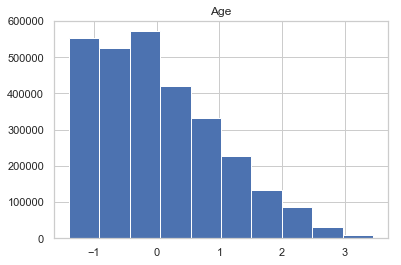

In [72]:
df_scaled.hist('Age')

In [75]:
df_utilitarian_scaled = df_scaled.loc[df_scaled['ScenarioType'] == 'Utilitarian']
df_utilitarian_scaled = df_utilitarian_scaled.drop("ScenarioType", axis = 1)
df_utilitarian_scaled.to_csv('df_utilitarian_logscaled.csv')

In [74]:
df_utilitarian_scaled.describe()

,UserID,Saved,Age,Income,Political_level,Religious_level
count,578111.00,578111.00,578111.00,578111.00,578111.00,578111.00
mean,4995044917724540.00,0.79,0.00,0.00,0.00,0.00
std,2887793284724054.50,0.41,1.00,1.00,1.00,1.00
min,2271406345.00,0.00,-1.40,-1.50,-2.70,-0.86
25%,2489520248623790.00,1.00,-0.88,-1.50,-0.37,-0.86
50%,5003807089876310.00,1.00,-0.15,0.54,0.03,-0.52
75%,7496104481186080.00,1.00,0.66,0.72,0.77,0.91
max,9999992505199810.00,1.00,3.45,0.95,1.28,2.17


**Save Young**

In [103]:
df_saveyoung_scaled = df_scaled.loc[df_scaled['ScenarioType'] == 'Age']
df_saveyoung_scaled = df_saveyoung_scaled.drop("ScenarioType", axis = 1)
df_saveyoung_scaled.to_csv('df_saveyoung_logscaled.csv')

**Save Fit**

In [104]:
df_savefit_scaled = df_scaled.loc[df_scaled['ScenarioType'] == 'Fitness']
df_savefit_scaled = df_savefit_scaled.drop("ScenarioType", axis = 1)
df_savefit_scaled.to_csv('df_savefit_logscaled.csv')

**Save Male**

In [105]:
df_savemale_scaled = df_scaled.loc[df_scaled['ScenarioType'] == 'Gender']
df_savemale_scaled = df_savemale_scaled.drop("ScenarioType", axis = 1)
df_savemale_scaled.to_csv('df_savemale_logscaled.csv')

**Save High Class**

In [106]:
df_savehigh_scaled = df_scaled.loc[df_scaled['ScenarioType'] == 'Social Status']
df_savehigh_scaled = df_savehigh_scaled.drop("ScenarioType", axis = 1)
df_savehigh_scaled.to_csv('df_savehigh_logscaled.csv')

**Save Humans**

In [107]:
df_savehumans_scaled = df_scaled.loc[df_scaled['ScenarioType'] == 'Species']
df_savehumans_scaled = df_savehumans_scaled.drop("ScenarioType", axis = 1)
df_savehumans_scaled.to_csv('df_savehumans_logscaled.csv')

**Lets make dummy variables**

In [73]:
cat_vars=['Education','Gender']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    df=data1
cat_vars=['Education','Gender']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [74]:
data_final=df[to_keep]
data_final.columns.values
df = data_final

In [75]:
#df = pd.get_dummies(df, columns=["Education", "Gender"])

In [76]:
df = df.drop("AttributeLevel", axis = 1)
df.head(20)

,UserID,ScenarioType,Saved,Country,Age,Income,Political_level,Religious_level,Education_bachelor,Education_college,Education_graduate,Education_high,Education_underHigh,Education_vocational,Gender_female,Gender_male
ResponseID,,,,,,,,,,,,,,,,
J6WRHLj8exr4bNwTm,6968366610050750.00,Age,0,RUS,32.00,35000.00,0.50,0.61,1,0,0,0,0,0,0,1
ZQsAWst58jK9HcKvx,6968366610050750.00,Fitness,0,RUS,32.00,35000.00,0.50,0.61,1,0,0,0,0,0,0,1
nej5j6wM9YmiGHgA7,6968366610050750.00,Utilitarian,1,RUS,32.00,35000.00,0.50,0.61,1,0,0,0,0,0,0,1
sibXCK6jno3M94BnR,6968366610050750.00,Species,1,RUS,32.00,35000.00,0.50,0.61,1,0,0,0,0,0,0,1
zX9S9puJMRXnd54jY,6968366610050750.00,Utilitarian,0,RUS,32.00,35000.00,0.50,0.61,1,0,0,0,0,0,0,1
QMcdnKDXB8aCjcyY7,5603843098383970.00,Species,1,BEL,23.00,35000.00,0.65,0.00,0,0,1,0,0,0,0,1
ex8Yry3j5xs2gQB9t,5603843098383970.00,Fitness,0,BEL,23.00,35000.00,0.65,0.00,0,0,1,0,0,0,0,1
gTsX5fFbjHHpeQWvf,5603843098383970.00,Age,0,BEL,23.00,35000.00,0.65,0.00,0,0,1,0,0,0,0,1
i7ztRb5RdTu27QT4y,5603843098383970.00,Gender,1,BEL,23.00,35000.00,0.65,0.00,0,0,1,0,0,0,0,1


**Make different datasets for each scenario**


In [77]:
df_savemore = df.loc[df['ScenarioType'] == 'Utilitarian']
df_saveyoung = df.loc[df['ScenarioType'] == 'Age']
df_savefit = df.loc[df['ScenarioType'] == 'Fit']
df_savehumans = df.loc[df['ScenarioType'] == 'Species']
df_savemale = df.loc[df['ScenarioType'] == 'Gender']
df_savehighclass =  df.loc[df['ScenarioType'] == 'Social Status']

In [78]:
df_savemore.head()

,UserID,ScenarioType,Saved,Country,Age,Income,Political_level,Religious_level,Education_bachelor,Education_college,Education_graduate,Education_high,Education_underHigh,Education_vocational,Gender_female,Gender_male
ResponseID,,,,,,,,,,,,,,,,
nej5j6wM9YmiGHgA7,6968366610050750.00,Utilitarian,1,RUS,32.00,35000.00,0.50,0.61,1,0,0,0,0,0,0,1
zX9S9puJMRXnd54jY,6968366610050750.00,Utilitarian,0,RUS,32.00,35000.00,0.50,0.61,1,0,0,0,0,0,0,1
9baC2PcmDRyCsqR3n,8735659664189850.00,Utilitarian,0,USA,23.00,50000.00,1.00,0.00,1,0,0,0,0,0,0,1
FoZm5A7xZ8wS2yXHT,61324042610620.00,Utilitarian,1,USA,23.00,50000.00,0.93,0.00,1,0,0,0,0,0,0,1
MRHGpdddzb3cXmLco,61324042610620.00,Utilitarian,1,USA,23.00,50000.00,0.93,0.00,1,0,0,0,0,0,0,1


**Logistic regression model with Savemore**

In [115]:
print(len(df_savemore[df_savemore['Saved']==0]))
print(len(df_savemore[df_savemore['Saved']==1]))
df_savemore.groupby('Saved').mean()

124076
454035


,UserID,Age,Income,Political_level,Religious_level,Education_bachelor,Education_college,Education_graduate,Education_high,Education_underHigh,Education_vocational,Gender_female,Gender_male
Saved,,,,,,,,,,,,,
0,4992491636630392.00,28.06,27014.61,0.61,0.25,0.30,0.18,0.26,0.17,0.04,0.05,0.21,0.79
1,4995742663284148.00,27.31,25199.17,0.63,0.25,0.29,0.19,0.25,0.18,0.05,0.05,0.25,0.75


**On this occasion with SMOTE to balance samples**

In [116]:
X = df_savemore.drop(["UserID", "ScenarioType", "Country", 'Saved'], axis = 1)
y = df_savemore['Saved']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Saved'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of Not Saved in oversampled data",len(os_data_y[os_data_y['Saved']==0]))
print("Number of Saved",len(os_data_y[os_data_y['Saved']==1]))
print("Proportion of Not Saved data in oversampled data is ",len(os_data_y[os_data_y['Saved']==0])/len(os_data_X))
print("Proportion of Saved data in oversampled data is ",len(os_data_y[os_data_y['Saved']==1])/len(os_data_X))

length of oversampled data is  635218
Number of Not Saved in oversampled data 317609
Number of Saved 317609
Proportion of Not Saved data in oversampled data is  0.5
Proportion of Saved data in oversampled data is  0.5


In [117]:
X = os_data_X
y= os_data_y

In [118]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.691211
         Iterations: 35
                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     0.003      
Dependent Variable:       Saved                AIC:                  878160.8790
Date:                     2019-11-18 11:09     BIC:                  878285.8580
No. Observations:         635218               Log-Likelihood:       -4.3907e+05
Df Model:                 10                   LL-Null:              -4.4030e+05
Df Residuals:             635207               LLR p-value:          0.0000     
Converged:                0.0000               Scale:                1.0000     
No. Iterations:           35.0000                                               
--------------------------------------------------------------------------------
                      Coef.   Std.Err.     z     P>|z|     [0.025       0.975]  
----------------------------------------------------------------------------

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.51


In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[58524 36847]
 [55806 39389]]


**This would be the version without SMOTE**

In [132]:
X = df_savemore.drop(["UserID", "ScenarioType", "Country", 'Saved'], axis = 1)
y = df_savemore['Saved']


In [133]:
logit_model=sm.Logit(y, X)
result=logit_model.fit_regularized()
print(result.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.5187089160443995
            Iterations: 63
            Function evaluations: 77
            Gradient evaluations: 63
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.003      
Dependent Variable:  Saved             AIC:               599766.6603
Date:                2019-11-18 17:45  BIC:               599901.8706
No. Observations:    578111            Log-Likelihood:    -2.9987e+05
Df Model:            11                LL-Null:           -3.0063e+05
Df Residuals:        578099            LLR p-value:       0.0000     
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      63.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled)
#X_scaled.head()

In [131]:
logit_model=sm.Logit(y, X_scaled)
result=logit_model.fit_regularized()
print(result.summary2())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6922653663319873
            Iterations: 15
            Function evaluations: 15
            Gradient evaluations: 15
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.331     
Dependent Variable: Saved            AIC:              800436.4464
Date:               2019-11-18 17:44 BIC:              800571.6566
No. Observations:   578111           Log-Likelihood:   -4.0021e+05
Df Model:           11               LL-Null:          -3.0063e+05
Df Residuals:       578099           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     15.0000                                       
------------------------------------------------------------------
       Coef.    Std.Err.     z     P>|z|     [0.025       0.975]  
------------------------------------------------------------------
x1    -0.03

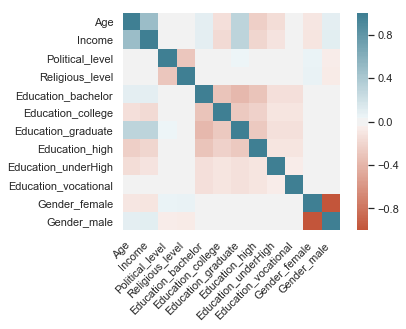

In [123]:
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[     0  37008]
 [     0 136426]]


**Lets jump into a mixed effects model and see output**

In [137]:
df_savemore = df_savemore.drop(["ScenarioType"], axis = 1)

In [138]:
df_savemore.to_csv('df_savemore.csv')

In [136]:
md = smf.mixedlm("Saved ~ Income", df_savemore, groups=df_savemore["Country"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Saved       
No. Observations: 578111  Method:             REML        
No. Groups:       76      Scale:              0.1679      
Min. group size:  218     Likelihood:         -304645.8762
Max. group size:  115833  Converged:          No          
Mean group size:  7606.7                                  
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   0.790     0.006  123.377  0.000   0.777   0.802
Income     -0.000     0.000  -22.303  0.000  -0.000  -0.000
Group Var   0.003                                          

